<a href="https://colab.research.google.com/github/MohdIstiaqHossainJunaid/Bangla-Food-Review-Sentimental-Analysis-using-Machine-Learning/blob/main/(tf_idf)CSE498R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Sentiment Analysis Model of Food Reviews in Bengali Texts Based on Deep Learning techniques.**

Supervisor- **Afn1**



**Memebers:**

1.   **Mohd. Istiaq Hossain Junaid,1821577642**
2.   Faisal Hossain
3.   Udayan shah Upal
4.   Anjana tameem(Unofficial)





In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import string 
import cufflinks as cf
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [100]:
import pandas as pd
import io
df = pd.read_csv("/content/drive/MyDrive/Playing with Data/Food Review - Food Review.csv")
df.head()

,Speech,Label
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1
4,আমি খাইসি খুবই মজার,1


In [101]:
df['Label'].value_counts()

1    520
0    520
Name: Label, dtype: int64

In [102]:
df.duplicated().sum()

0

## Removing punctuations

In [103]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
def remove_punctuation(txt):
    punctuation_list = str(string.punctuation) + "।"
    txt_nopunct = "".join([c for c in txt if c not in punctuation_list])
    return txt_nopunct

In [105]:
def remove_garbage(a):
  a= "".join(i for i in a if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  removed=" ".join(a.split())
  return removed

In [106]:
df['Removed Puncutation'] = df['Speech'].apply(lambda x:remove_punctuation(x))
df.head()

,Speech,Label,Removed Puncutation
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার


In [107]:
df['remove Eng'] = df['Removed Puncutation'].apply(lambda x:remove_garbage(x))
df

,Speech,Label,Removed Puncutation,remove Eng
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার
...,...,...,...,...
1035,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,1,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে
1036,সবসময়ই অসাধারণ রান্না ভাই।😍😍🥰,1,সবসময়ই অসাধারণ রান্না ভাই😍😍🥰,সবসময়ই অসাধারণ রান্না ভাই
1037,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,1,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ্ছে এ...
1038,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,1,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,অসম্ভব সুন্দর বিরানি রেসিপি


In [108]:
pip install bnlp_toolkit

In [109]:
pip install bnlp_toolkit


In [110]:
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

df['Removed Stopped word'] = df['remove Eng'].apply(lambda x: remove_stopwords(x,stopwords))
df 

,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ..."
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]"
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক..."
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]"
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]"
...,...,...,...,...,...
1035,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,1,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে 😋😋,দেখেই খেয়ে ফেলতে ইচ্ছা হচ্ছে,"[দেখেই, খেয়ে, ফেলতে, ইচ্ছা]"
1036,সবসময়ই অসাধারণ রান্না ভাই।😍😍🥰,1,সবসময়ই অসাধারণ রান্না ভাই😍😍🥰,সবসময়ই অসাধারণ রান্না ভাই,"[সবসময়ই, অসাধারণ, রান্না, ভাই]"
1037,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,1,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ...,চিকেন বিরিয়ানিটা অনেক মজা হবে দেখে মনে হচ্ছে এ...,"[চিকেন, বিরিয়ানিটা, মজা, একটু, খেয়ে, দেখি]"
1038,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,1,অসম্ভব সুন্দর বিরানি রেসিপি 👌👌,অসম্ভব সুন্দর বিরানি রেসিপি,"[অসম্ভব, সুন্দর, বিরানি, রেসিপি]"


In [111]:
pip install bangla-stemmer

In [112]:
from bangla_stemmer.stemmer import stemmer
wordlist = ['কবিরগুলিকে', 'আমাকে', 'নামাবার']
stmr = stemmer.BanglaStemmer()
stm = stmr.stem(wordlist)
print(stm)

applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
['কবির', 'আমা', 'নামা']


In [113]:

from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()

In [114]:
df['stemmed'] = df['Removed Stopped word'].apply(lambda x:stmr.stem(x))

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..

In [115]:
df['sentence']=df['stemmed'].apply(' '.join)
df.head()

,Speech,Label,Removed Puncutation,remove Eng,Removed Stopped word,stemmed,sentence
0,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,1,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটা...,ব্যাস্ততম জীবনের একটু মনরম পরিবেশে সময় কাটানোর...,"[ব্যাস্ততম, জীবনের, একটু, মনরম, পরিবেশে, সময়, ...","[ব্যাস্ততম, জীবন, একটু, মনরম, পরিবেশ, সময়, কাট...",ব্যাস্ততম জীবন একটু মনরম পরিবেশ সময় কাটানোর ঘু...
1,অসাধারণ পরিবেশ! খুব সুন্দর মার্জিত এবং আন্তরিক...,1,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,অসাধারণ পরিবেশ খুব সুন্দর মার্জিত এবং আন্তরিক ...,"[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]","[অসাধারণ, পরিবেশ, সুন্দর, মার্জিত, আন্তরিক]",অসাধারণ পরিবেশ সুন্দর মার্জিত আন্তরিক
2,খাবারের মান যথেষ্ট খারাপ। দামের তুলনায় পরিমান ...,0,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,খাবারের মান যথেষ্ট খারাপ দামের তুলনায় পরিমান অ...,"[খাবারের, মান, খারাপ, দামের, তুলনায়, পরিমান, ক...","[খাবারের, মান, খারাপ, দাম, তুলনায়, পরিমান, কম,...",খাবারের মান খারাপ দাম তুলনায় পরিমান কম ইফত প্ল...
3,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,1,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,ভালো বহুত খেয়েছি আমার বাসা থেকে একটু দূরে,"[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]","[ভালো, বহুত, খেয়েছি, বাসা, একটু, দূরে]",ভালো বহুত খেয়েছি বাসা একটু দূরে
4,আমি খাইসি খুবই মজার,1,আমি খাইসি খুবই মজার,আমি খাইসি খুবই মজার,"[খাইসি, খুবই, মজার]","[খাইসি, খুব, মজ]",খাইসি খুব মজ


##**Machine Learning Models Applied**
1. **Linear SVC**
2. **Multinomial Naive Bayes**
3. **Logistic regression**
4. **Decision Tree**
5. **Random Forrest Classfier**


**TfidfVectorizer**

In [116]:
X=df['sentence']
y=df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify= y)

In [117]:
vectorizer = TfidfVectorizer()
X_train_tfvect = vectorizer.fit_transform(X_train)
X_train_tfvect.shape
X_test_tfvect=vectorizer.fit_transform(X_test)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Speech                1040 non-null   object
 1   Label                 1040 non-null   int64 
 2   Removed Puncutation   1040 non-null   object
 3   remove Eng            1040 non-null   object
 4   Removed Stopped word  1040 non-null   object
 5   stemmed               1040 non-null   object
 6   sentence              1040 non-null   object
dtypes: int64(1), object(6)
memory usage: 57.0+ KB


## **Linear SVC**

In [119]:
clf = LinearSVC()
clf.fit(X_train_tfvect,y_train)

LinearSVC()

In [120]:
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [121]:
predictions=text_clf.predict(X_test)

In [122]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[67 37]
 [23 81]]


In [123]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       104
           1       0.69      0.78      0.73       104

    accuracy                           0.71       208
   macro avg       0.72      0.71      0.71       208
weighted avg       0.72      0.71      0.71       208



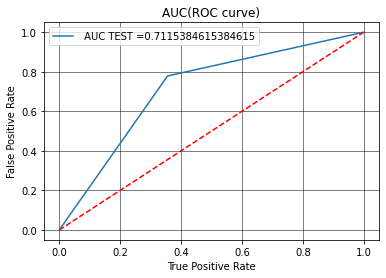

In [124]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## **Multinomial Naive Bayes**

In [125]:
nb_model = MultinomialNB()

nb_model.fit(X_train_tfvect, y_train)

MultinomialNB()

In [126]:
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('nb_model',MultinomialNB())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb_model', MultinomialNB())])

In [127]:
predictions=text_clf.predict(X_test)

In [128]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[82 22]
 [46 58]]


In [129]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       104
           1       0.72      0.56      0.63       104

    accuracy                           0.67       208
   macro avg       0.68      0.67      0.67       208
weighted avg       0.68      0.67      0.67       208



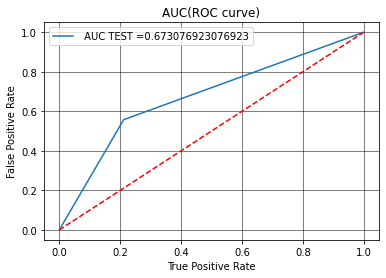

In [130]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## **Logistic regression**

In [131]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfvect,y_train)
text_lr=Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])
text_lr.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [132]:
predictions=text_lr.predict(X_test)

In [133]:
print(metrics.confusion_matrix(y_test,predictions))

[[76 28]
 [23 81]]


In [134]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       104
           1       0.74      0.78      0.76       104

    accuracy                           0.75       208
   macro avg       0.76      0.75      0.75       208
weighted avg       0.76      0.75      0.75       208



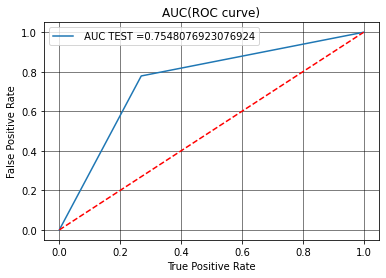

In [135]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## **Decision Tree**

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_tfvect,y_train)

DecisionTreeClassifier()

In [137]:
text_dt=Pipeline([('tfidf',TfidfVectorizer()),('clf',DecisionTreeClassifier())])
text_dt.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [138]:
predictions=text_dt.predict(X_test)

In [139]:
print(metrics.confusion_matrix(y_test,predictions))

[[69 35]
 [26 78]]


In [140]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       104
           1       0.69      0.75      0.72       104

    accuracy                           0.71       208
   macro avg       0.71      0.71      0.71       208
weighted avg       0.71      0.71      0.71       208



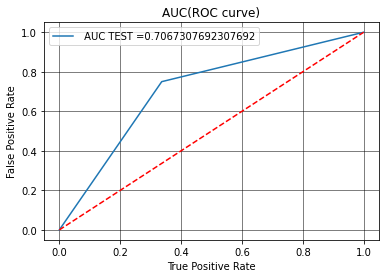

In [141]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Random Forrest Classfier 

In [142]:
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier()
dt.fit(X_train_tfvect,y_train)


RandomForestClassifier()

In [143]:
text_dt=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier())])
text_dt.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [144]:
predictions=text_dt.predict(X_test)

In [145]:
print(metrics.confusion_matrix(y_test,predictions))

[[67 37]
 [22 82]]


In [146]:
print(metrics.classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.75      0.64      0.69       104
           1       0.69      0.79      0.74       104

    accuracy                           0.72       208
   macro avg       0.72      0.72      0.71       208
weighted avg       0.72      0.72      0.71       208



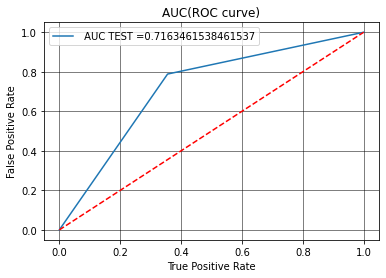

In [147]:
from sklearn.metrics import roc_curve, auc
#train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predictions)

plt.grid()

#plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()